In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [3]:
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [4]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].LowPtElectron.fields)

['ID', 'convVtxRadius', 'deltaEtaSC', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eInvMinusPInv', 'embeddedID', 'energyErr', 'eta', 'hoe', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'phi', 'pt', 'ptbiased', 'r9', 'scEtOverPt', 'sieie', 'unbiased', 'charge', 'convWP', 'pdgId', 'convVeto', 'lostHits', 'genPartIdx', 'genPartFlav']


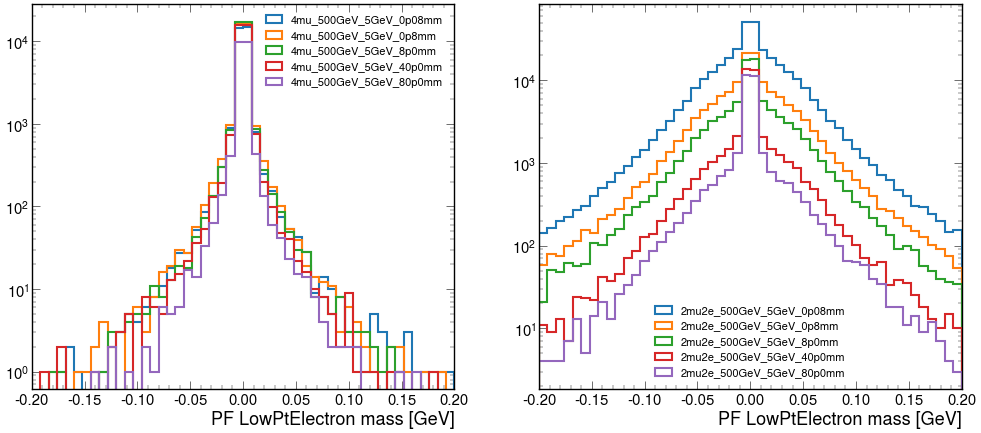

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    ax[0].hist(ak.flatten(events_4mu[i_4mu].LowPtElectron.mass), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].LowPtElectron.mass), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.2,0.2)
ax[1].set_xlim(-0.2,0.2)
ax[0].set_xlabel('PF LowPtElectron mass [GeV]')
ax[1].set_xlabel('PF LowPtElectron mass [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")

In [9]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['PuppiMET', 'SoftActivityJetNjets2', 'Jet', 'TrigObj', 'Flag', 'GenPart', 'GenVisTau', 'LHEPart', 'LHE', 'LHEScaleWeight', 'GenMET', 'run', 'OtherPV', 'SoftActivityJet', 'fixedGridRhoFastjetCentralCalo', 'DSAMuon', 'LHEPdfWeight', 'LowPtElectron', 'IsoTrack', 'SoftActivityJetHT10', 'PV', 'L1PreFiringWeight', 'DeepMETResponseTune', 'L1Reco', 'PSWeight', 'genTtbarId', 'fixedGridRhoFastjetCentralNeutral', 'Tau', 'SoftActivityJetHT2', 'LHEReweightingWeight', 'TkMET', 'Generator', 'GenJetAK8', 'FsrPhoton', 'fixedGridRhoFastjetAll', 'Photon', 'LHEWeight', 'RawPuppiMET', 'SubJet', 'PatDSAMuonVertex', 'PatMuonVertex', 'SoftActivityJetHT5', 'CorrT1METJet', 'SV', 'GenDressedLepton', 'SoftActivityJetHT', 'HLTriggerFinalPath', 'genWeight', 'HLT', 'fixedGridRhoFastjetCentralChargedPileUp', 'HLTriggerFirstPath', 'Pileup', 'BS', 'FatJet', 'SoftActivityJetNjets5', 'fixedGridRhoFastjetCentral', 'ChsMET', 'luminosityBlock', 'Electron', 'L1simulation', 'GenJet', 'SoftActivityJetNjets10', 'GenIsolatedPho

In [19]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].event.fields)

[]
